<h1>Learning Portfolio Artifact 6</h1>

## Dijkstra's Algorithm
- **Description**: Dijkstra's algorithm, conceived by computer scientist Edsger W. Dijkstra in 1956, finds the shortest paths between nodes in a **weighted graph** (such as road networks).
- **How It Works**:
    1. Start from a source node.
    2. Explore neighboring nodes, updating their distances from the source.
    3. Choose the unvisited node with the lowest distance and repeat step 2.
    4. Mark visited nodes.
    5. The algorithm produces a shortest-path tree.
- **Use Cases**:
    - Network routing protocols (e.g., IS-IS, OSPF).
    - Finding optimal routes between cities based on driving distances.
- **Time Complexity**: Θ(|E| + |V| log |V|).

## A* Search Algorithm
- **Description**: A* (pronounced "A-star") is a graph traversal and pathfinding algorithm.
- **How It Works**:
    1. Given a weighted graph, a source node, and a goal node, A* finds the shortest path.
    2. It uses heuristics to guide the search, aiming for completeness, optimality, and efficiency.
    3. Stores all generated nodes in memory.
- **Trade-Off**:
    - A* finds the shortest path from a specific source to a specified goal, not the entire shortest-path tree.
- **Applications**:
    - Pathfinding in games, robotics, and navigation systems.
    - Solving puzzles (e.g., sliding tile puzzles).
- **Complexity**: Depends on the heuristic and graph structure.

## Other Shortest Path Algorithms
1. **Bellman-Ford Algorithm**:
    - Handles negative edge weights.
    - Complexity: O(|V| * |E|).
2. **Floyd-Warshall Algorithm**:
    - Finds all-pairs shortest paths.
    - Complexity: O(|V|^3).
3. **Johnson's Algorithm**:
    - Also computes all-pairs shortest paths.
    - Complexity: O(|V| * |E| + |V|^2 * log |V|).
4. **Depth-First Search (DFS)**:
    - Recursive exploration of adjacent nodes.
    - Works for acyclic graphs.
5. **Breadth-First Search (BFS)**:
    - Finds shortest paths for unweighted graphs.
6. **Topological Sort**:
    - Orders nodes in a directed acyclic graph.
7. **Multi-Source BFS**:
    - Extends BFS to multiple source nodes.

## Comparison
- Dijkstra's algorithm is guaranteed to find the shortest path but might be slow on large graphs.
- A* search algorithm is faster than Dijkstra's if a good heuristic is provided, but it doesn't guarantee finding the shortest path.
- Bellman-Ford algorithm handles negative edge weights but is slower than Dijkstra's algorithm.
- Floyd-Warshall algorithm finds all shortest paths between every pair of nodes but is less efficient than Dijkstra's for finding paths from a single source.
- Bidirectional search can be more efficient in certain scenarios, especially when you have well-defined source and destination nodes.

Implementing each algorithm on different networks and comparing their performance would involve analyzing factors such as graph size, density, edge weights, and specific requirements of the shortest path problem. Depending on the characteristics of the networks and the specific goals of the analysis, one algorithm may outperform others.

In [51]:
pip install networkx

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [52]:
import networkx as nx
import matplotlib.pyplot as plt

In [53]:
# Create a weighted graph
G = nx.Graph()
edges = [
    ('A', 'B', 4),
    ('A', 'H', 8),
    ('B', 'C', 8),
    ('B', 'H', 11),
    ('C', 'D', 7),
    ('C', 'F', 4),
    ('D', 'E', 9),
    ('D', 'F', 14),
    ('E', 'F', 10),
    ('F', 'G', 2),
    ('G', 'H', 1),
    ('G', 'I', 6),
    ('H', 'I', 7)
]
G.add_weighted_edges_from(edges)

This code snippet creates a weighted graph using NetworkX, a Python library for working with graphs. Let's break down what each part of the code does:

1. `G = nx.Graph()`: This line initializes an empty undirected graph using NetworkX and assigns it to the variable `G`.

2. `edges`: This is a list of tuples, where each tuple represents an edge in the graph. Each tuple contains three elements: the starting node, the ending node, and the weight of the edge.

3. `G.add_weighted_edges_from(edges)`: This line adds the edges specified in the `edges` list to the graph `G`, along with their weights. The method `add_weighted_edges_from` takes a list of tuples as input, where each tuple represents an edge and its weight.

The graph created in this code snippet represents a network where nodes are connected by edges with weights. For example, the edge ('A', 'B', 4) indicates that there is a connection between node 'A' and node 'B' with a weight of 4. Similarly, the edge ('G', 'I', 6) indicates a connection between nodes 'G' and 'I' with a weight of 6.

This weighted graph can be used to model various scenarios, such as transportation networks, social networks, or communication networks, where the weight of the edges may represent distances, costs, or some other measure of connectivity between nodes.

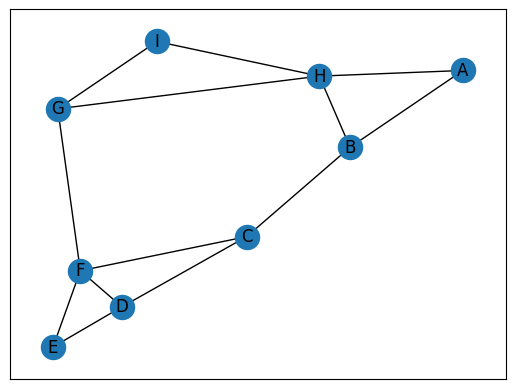

In [54]:
nx.draw_networkx(G)

Shortest paths from source node A:
A: 0
B: 4
H: 8
G: 9
F: 11
C: 12
I: 15
D: 19
E: 21


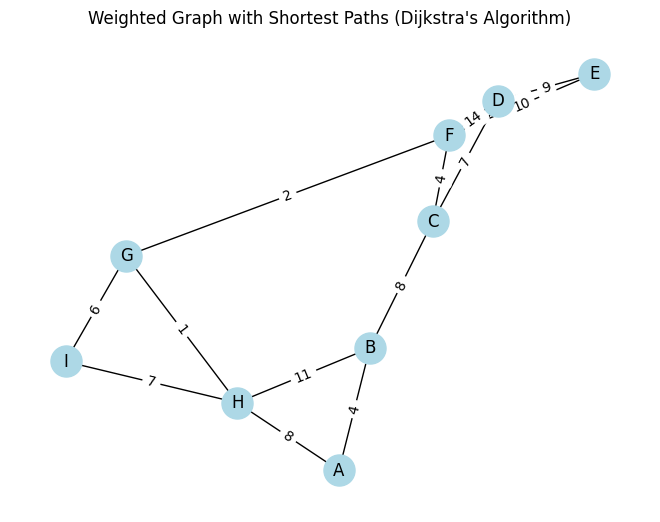

In [55]:
# Compute shortest paths using Dijkstra's algorithm
shortest_paths = nx.single_source_dijkstra_path_length(G, source='A')

# Print the shortest paths
print("Shortest paths from source node A:")
for node, distance in shortest_paths.items():
    print(f"{node}: {distance}")

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)})
plt.title("Weighted Graph with Shortest Paths (Dijkstra's Algorithm)")
plt.show()

This part of the code computes the shortest paths from a specified source node ('A') to all other nodes in the graph `G` using Dijkstra's algorithm, and then prints the shortest paths. Finally, it visualizes the graph with the computed shortest paths annotated on the edges. Here's a breakdown:

1. `shortest_paths = nx.single_source_dijkstra_path_length(G, source='A')`: This line uses NetworkX's `single_source_dijkstra_path_length` function to compute the shortest paths from the source node 'A' to all other nodes in the graph `G`. It returns a dictionary where the keys are the nodes and the values are the shortest distances from the source node 'A' to each node.

2. `print("Shortest paths from source node A:")`: This line simply prints a header indicating that the following output will display the shortest paths from the source node 'A'.

3. `for node, distance in shortest_paths.items():`: This loop iterates over the items (nodes and distances) in the dictionary of shortest paths computed earlier.

4. `print(f"{node}: {distance}")`: Inside the loop, this line prints each node along with its shortest distance from the source node 'A'.

5. Visualizing the graph:
   - `pos = nx.spring_layout(G, seed=42)`: This line computes the node positions for visualization using the spring layout algorithm, with a fixed random seed for reproducibility.
   - `nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')`: This draws the graph `G` with nodes labeled and node attributes specified for visualization.
   - `nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)})`: This annotates the edges of the graph with their respective weights.
   - `plt.title("Weighted Graph with Shortest Paths (Dijkstra's Algorithm)")`: Sets the title for the plot.
   - `plt.show()`: Displays the graph visualization.



Shortest path distance from source node A to node E: 21


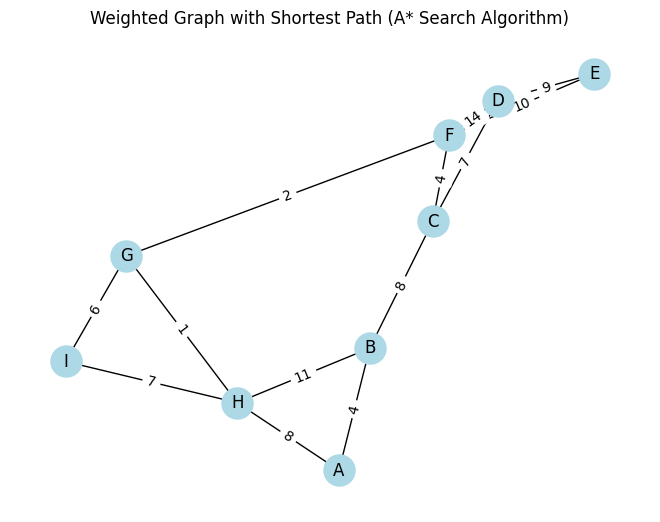

In [56]:

# Compute shortest paths using A* search algorithm
shortest_paths = nx.astar_path_length(G, source='A', target='E')

# Print the shortest paths
print("Shortest path distance from source node A to node E:", shortest_paths)

# Visualize the graph
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)})
plt.title("Weighted Graph with Shortest Path (A* Search Algorithm)")
plt.show()


This part of the code computes the shortest path from a specified source node ('A') to a target node ('E') in the graph `G` using the A* search algorithm. Then, it prints the shortest path distance and visualizes the graph with the computed shortest path annotated on the edges. Here's a breakdown:

1. `shortest_paths = nx.astar_path_length(G, source='A', target='E')`: This line uses NetworkX's `astar_path_length` function to compute the shortest path length from the source node 'A' to the target node 'E' in the graph `G` using the A* search algorithm. It returns the shortest path length as a numeric value.

2. `print("Shortest path distance from source node A to node E:", shortest_paths)`: This line simply prints the shortest path distance from the source node 'A' to the target node 'E'.

3. Visualizing the graph:
   - `pos = nx.spring_layout(G, seed=42)`: This line computes the node positions for visualization using the spring layout algorithm, with a fixed random seed for reproducibility.
   - `nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')`: This draws the graph `G` with nodes labeled and node attributes specified for visualization.
   - `nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): w['weight'] for u, v, w in G.edges(data=True)})`: This annotates the edges of the graph with their respective weights.
   - `plt.title("Weighted Graph with Shortest Path (A* Search Algorithm)")`: Sets the title for the plot.
   - `plt.show()`: Displays the graph visualization.

Let's create a problem of finding the shortest path between nodes in a graph representing a city's road network. We'll use Dijkstra's algorithm and A* search algorithm implemented in Python's NetworkX library to solve it.

Problem:
Consider a city with several landmarks connected by roads. We need to find the shortest path between two landmarks.

Solution:
We'll generate a random graph representing the road network and then use Dijkstra's algorithm and A* search algorithm to find the shortest path between two specified landmarks.

Here's a Python script to demonstrate this:

Source landmark: 0
Target landmark: 4


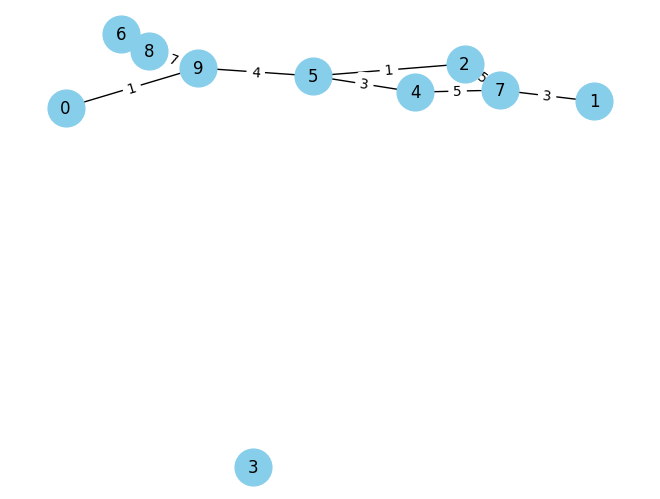

Shortest path using Dijkstra's algorithm: [0, 9, 5, 4]
Shortest path using A* algorithm: [0, 9, 5, 4]


In [57]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def generate_city_graph(num_nodes, num_edges):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i)
    for _ in range(num_edges):
        node1 = random.randint(0, num_nodes - 1)
        node2 = random.randint(0, num_nodes - 1)
        weight = random.randint(1, 10)  # Random weight for the edge
        G.add_edge(node1, node2, weight=weight)
    return G

def dijkstra_shortest_path(graph, source, target):
    return nx.dijkstra_path(graph, source, target)

def a_star_shortest_path(graph, source, target):
    return nx.astar_path(graph, source, target)

def draw_graph(graph):
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue")
    labels = nx.get_edge_attributes(graph, "weight")
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    plt.show()

# Generating a city graph
city_graph = generate_city_graph(10, 15)

# Selecting random source and target landmarks
source = random.choice(list(city_graph.nodes()))
target = random.choice(list(city_graph.nodes()))

print("Source landmark:", source)
print("Target landmark:", target)

# Drawing the city graph
draw_graph(city_graph)

# Finding the shortest path using Dijkstra's algorithm
shortest_path_dijkstra = dijkstra_shortest_path(city_graph, source, target)
print("Shortest path using Dijkstra's algorithm:", shortest_path_dijkstra)

# Finding the shortest path using A* algorithm
shortest_path_astar = a_star_shortest_path(city_graph, source, target)
print("Shortest path using A* algorithm:", shortest_path_astar)


We can set specific source and target instead of randomly generating them to see the shortest distance between the landmarks of our interest.